## INDIA AIR QUALITY DATA ANALYSIS, VISUALISATION AND PREDICTION

The Air Quality Index (AQI) is a statistic for assessing the quality of the air in our immediate surroundings. It measures how air pollution can affect an individual’s health within a specified period of time. The common air pollutants are Particulate Matter (PM2.5, PM10), Nitrogen Dioxide (NO2) Carbon Monoxide (CO), Sulphur Dioxide (SO2) and Ozone (O3).This project was to evaluate and investigate condition and quality of the air by measuring Air Quality Index (AQI) for the development of environment. This study was carried out based on measuring four major air pollutants such as PM10, PM2.5, SO2 and NO2 with various ambiance conditions during January 2015 to July 2020 After a preliminary study of the available algorithms and data review, it became apparent that the problem fell under the linear regression category. The major discovery is that the machine learning approach should be suitable for these types of problems due to many aspects. We developed a model to predict the air quality index based on historical data of previous years and predicting over a particular upcoming year as a Gradient decent boosted multivariable regression problem

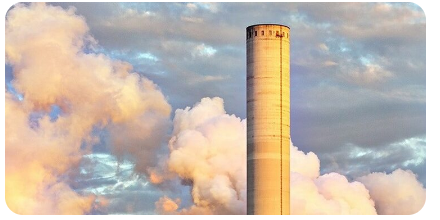

### ▶️Step 1) Importing necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from datetime import datetime
import warnings
warnings.filterwarnings("ignore")

In [2]:
from pywaffle import Waffle
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from plotly.offline import init_notebook_mode, iplot
from bubbly.bubbly import bubbleplot

### ▶️Step 2) Reading and Understanding the Data

In [3]:
df=pd.read_csv("C:/Users/HP/Documents/Eduverse topics/Reg_ML/city_day.csv",parse_dates=True)

In [4]:
df['Date']=pd.to_datetime(df['Date'])

In [5]:
df.head()

City       Date  PM2.5  PM10     NO    NO2    NOx  NH3     CO    SO2  \
0  Ahmedabad 2015-01-01    NaN   NaN   0.92  18.22  17.15  NaN   0.92  27.64   
1  Ahmedabad 2015-01-02    NaN   NaN   0.97  15.69  16.46  NaN   0.97  24.55   
2  Ahmedabad 2015-01-03    NaN   NaN  17.40  19.30  29.70  NaN  17.40  29.07   
3  Ahmedabad 2015-01-04    NaN   NaN   1.70  18.48  17.97  NaN   1.70  18.59   
4  Ahmedabad 2015-01-05    NaN   NaN  22.10  21.42  37.76  NaN  22.10  39.33   

       O3  Benzene  Toluene  Xylene  AQI AQI_Bucket  
0  133.36     0.00     0.02    0.00  NaN        NaN  
1   34.06     3.68     5.50    3.77  NaN        NaN  
2   30.70     6.80    16.40    2.25  NaN        NaN  
3   36.08     4.43    10.14    1.00  NaN        NaN  
4   39.31     7.01    18.89    2.78  NaN        NaN

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   City        29531 non-null  object        
 1   Date        29531 non-null  datetime64[ns]
 2   PM2.5       24933 non-null  float64       
 3   PM10        18391 non-null  float64       
 4   NO          25949 non-null  float64       
 5   NO2         25946 non-null  float64       
 6   NOx         25346 non-null  float64       
 7   NH3         19203 non-null  float64       
 8   CO          27472 non-null  float64       
 9   SO2         25677 non-null  float64       
 10  O3          25509 non-null  float64       
 11  Benzene     23908 non-null  float64       
 12  Toluene     21490 non-null  float64       
 13  Xylene      11422 non-null  float64       
 14  AQI         24850 non-null  float64       
 15  AQI_Bucket  24850 non-null  object        
dtypes: datetime64[ns](1), 

In [7]:
df.describe()

PM2.5          PM10            NO           NO2           NOx  \
count  24933.000000  18391.000000  25949.000000  25946.000000  25346.000000   
mean      67.450578    118.127103     17.574730     28.560659     32.309123   
std       64.661449     90.605110     22.785846     24.474746     31.646011   
min        0.040000      0.010000      0.020000      0.010000      0.000000   
25%       28.820000     56.255000      5.630000     11.750000     12.820000   
50%       48.570000     95.680000      9.890000     21.690000     23.520000   
75%       80.590000    149.745000     19.950000     37.620000     40.127500   
max      949.990000   1000.000000    390.680000    362.210000    467.630000   

                NH3            CO           SO2            O3       Benzene  \
count  19203.000000  27472.000000  25677.000000  25509.000000  23908.000000   
mean      23.483476      2.248598     14.531977     34.491430      3.280840   
std       25.684275      6.962884     18.133775     21.694928     15.811136   
min        0.010000      0.000000      0.010000      0.010000      0.000000   
25%        8.580000      0.510000      5.670000     18.860000      0.120000   
50%       15.850000      0.890000      9.160000     30.840000      1.070000   
75%       30.020000      1.450000     15.220000     45.570000      3.080000   
max      352.890000    175.810000    193.860000    257.730000    455.030000   

            Toluene        Xylene           AQI  
count  21490.000000  11422.000000  24850.000000  
mean       8.700972      3.070128    166.463581  
std       19.969164      6.323247    140.696585  
min        0.000000      0.000000     13.000000  
25%        0.600000      0.140000     81.000000  
50%        2.970000      0.980000    118.000000  
75%        9.150000      3.350000    208.000000  
max      454.850000    170.370000   2049.000000

In [8]:
grp_state=df.groupby(['City'])

In [9]:
def impute_mean_by_state(series):
    return series.fillna(series.mean())

In [10]:
df['PM2.5']=grp_state['PM2.5'].transform(impute_mean_by_state)  #fill value with mean value group by state
df['PM10']=grp_state['PM10'].transform(impute_mean_by_state)
df['NO2']=grp_state['NO2'].transform(impute_mean_by_state)
df['NO']=grp_state['NO'].transform(impute_mean_by_state)
df['NOx']=grp_state['NOx'].transform(impute_mean_by_state)
df['NH3']=grp_state['NH3'].transform(impute_mean_by_state)  #fill value with mean value group by state
df['CO']=grp_state['CO'].transform(impute_mean_by_state)
df['SO2']=grp_state['SO2'].transform(impute_mean_by_state)
df['O3']=grp_state['O3'].transform(impute_mean_by_state)
df['Benzene']=grp_state['Benzene'].transform(impute_mean_by_state)
df['Toluene']=grp_state['Toluene'].transform(impute_mean_by_state)
df['Xylene']=grp_state['Xylene'].transform(impute_mean_by_state)
df['AQI']=grp_state['AQI'].transform(impute_mean_by_state)

In [11]:
AQI_levels=pd.DataFrame(df['AQI_Bucket'].value_counts()).to_dict()['AQI_Bucket']

In [12]:
AQI_levels

{'Moderate': 8829,
 'Satisfactory': 8224,
 'Poor': 2781,
 'Very Poor': 2337,
 'Good': 1341,
 'Severe': 1338}

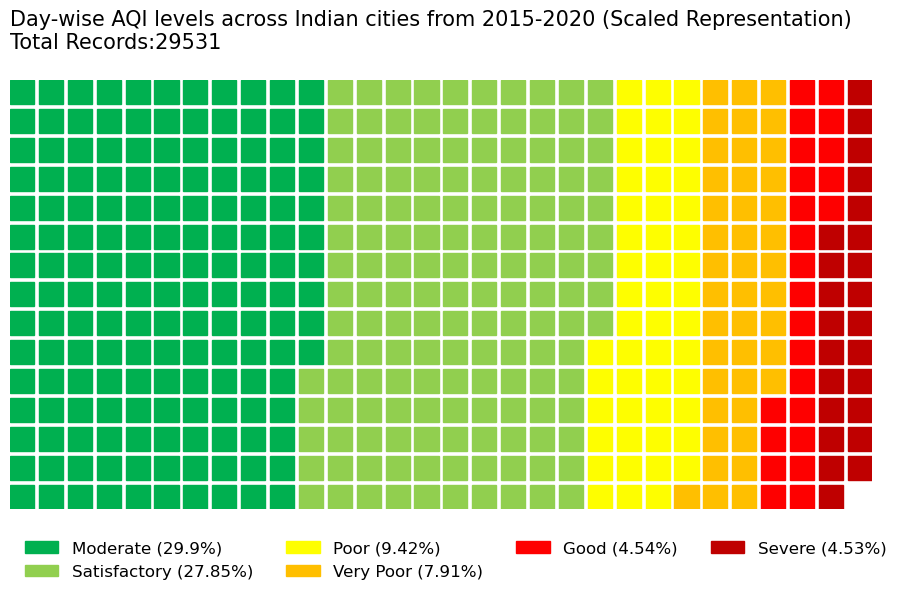

In [13]:
# plot
fig = plt.figure(
    title={
        'label': 'Day-wise AQI levels across Indian cities from 2015-2020 (Scaled Representation)\nTotal Records:29531\n',
        'loc': 'left',
        'fontdict': {
            'fontsize': 15,
        }
    },
    FigureClass=Waffle, 
    rows=15, 
    columns=30,
    values=AQI_levels, 
    colors=['#00b050', '#91cf4f', "#fefe00", "#ffbf00", "#fe0000", "#bf0000"],
    labels=[f"{k} ({round((v/df.shape[0]*100),2)}%)" for k, v in AQI_levels.items()],
    #legend={'loc': 'upper left', 'bbox_to_anchor': (1.1, 1)},
    legend={
        # 'labels': [f"{k} ({v}%)" for k, v in data.items()],  # lebels could also be under legend instead
        'loc': 'lower left',
        'bbox_to_anchor': (0, -0.2),
        'ncol': 4,
        'framealpha': 0,
        'fontsize': 12
    },
    block_arranging_style='style',
    figsize=(10, 20),
    starting_location='NW',
    vertical=False,
)
# show plot
plt.show()

### ▶️Step 3) Exploratory Data Analysis (EDA)

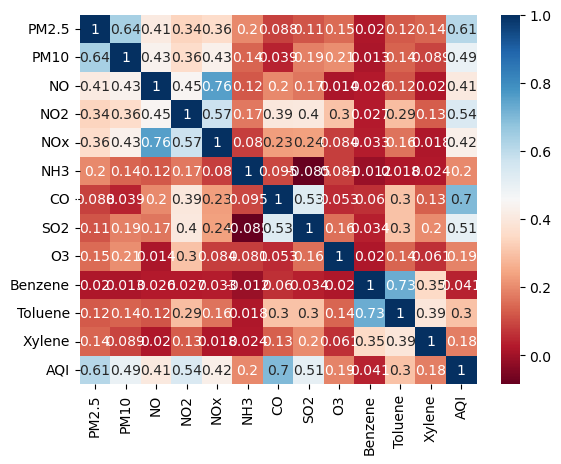

In [14]:
sns.heatmap(df.corr(), annot=True, cmap='RdBu')   # due to high corr e remove 
plt.show()


In [15]:
df.isnull().sum()   #Toluene  #NOx remove

City              0
Date              0
PM2.5             0
PM10           2009
NO                0
NO2               0
NOx            1169
NH3            2009
CO                0
SO2               0
O3              162
Benzene        2732
Toluene        4010
Xylene        13047
AQI               0
AQI_Bucket     4681
dtype: int64

In [16]:
df.drop(columns=['Toluene','NOx'],inplace=True)

In [17]:
data_state_Wise= pd.DataFrame(df['City'].value_counts()).sort_values(by='City', ascending=True).to_dict()['City']

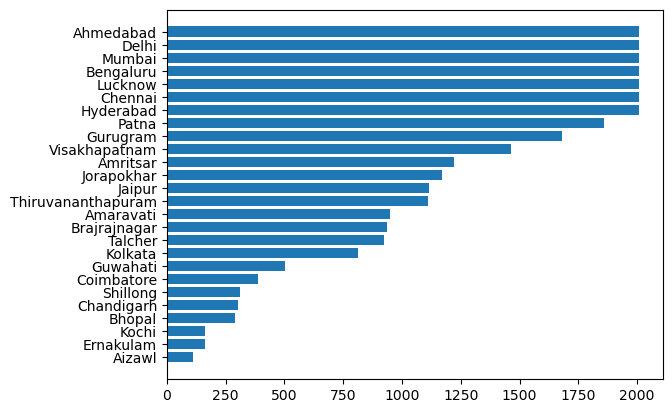

In [18]:
keys = data_state_Wise.keys()
values = data_state_Wise.values()
plt.barh(list(keys), list(values))
plt.show()

In [20]:
count= df.groupby(['City','AQI_Bucket']).count().reset_index()

In [21]:
good=count.loc[count['AQI_Bucket']=='Good']
Moderate=count.loc[count['AQI_Bucket']=='Moderate']
Poor=count.loc[count['AQI_Bucket']=='Poor']
Satisfactory=count.loc[count['AQI_Bucket']=='Satisfactory']
Severe=count.loc[count['AQI_Bucket']=='Severe']
Very_Poor=count.loc[count['AQI_Bucket']=='Very Poor']

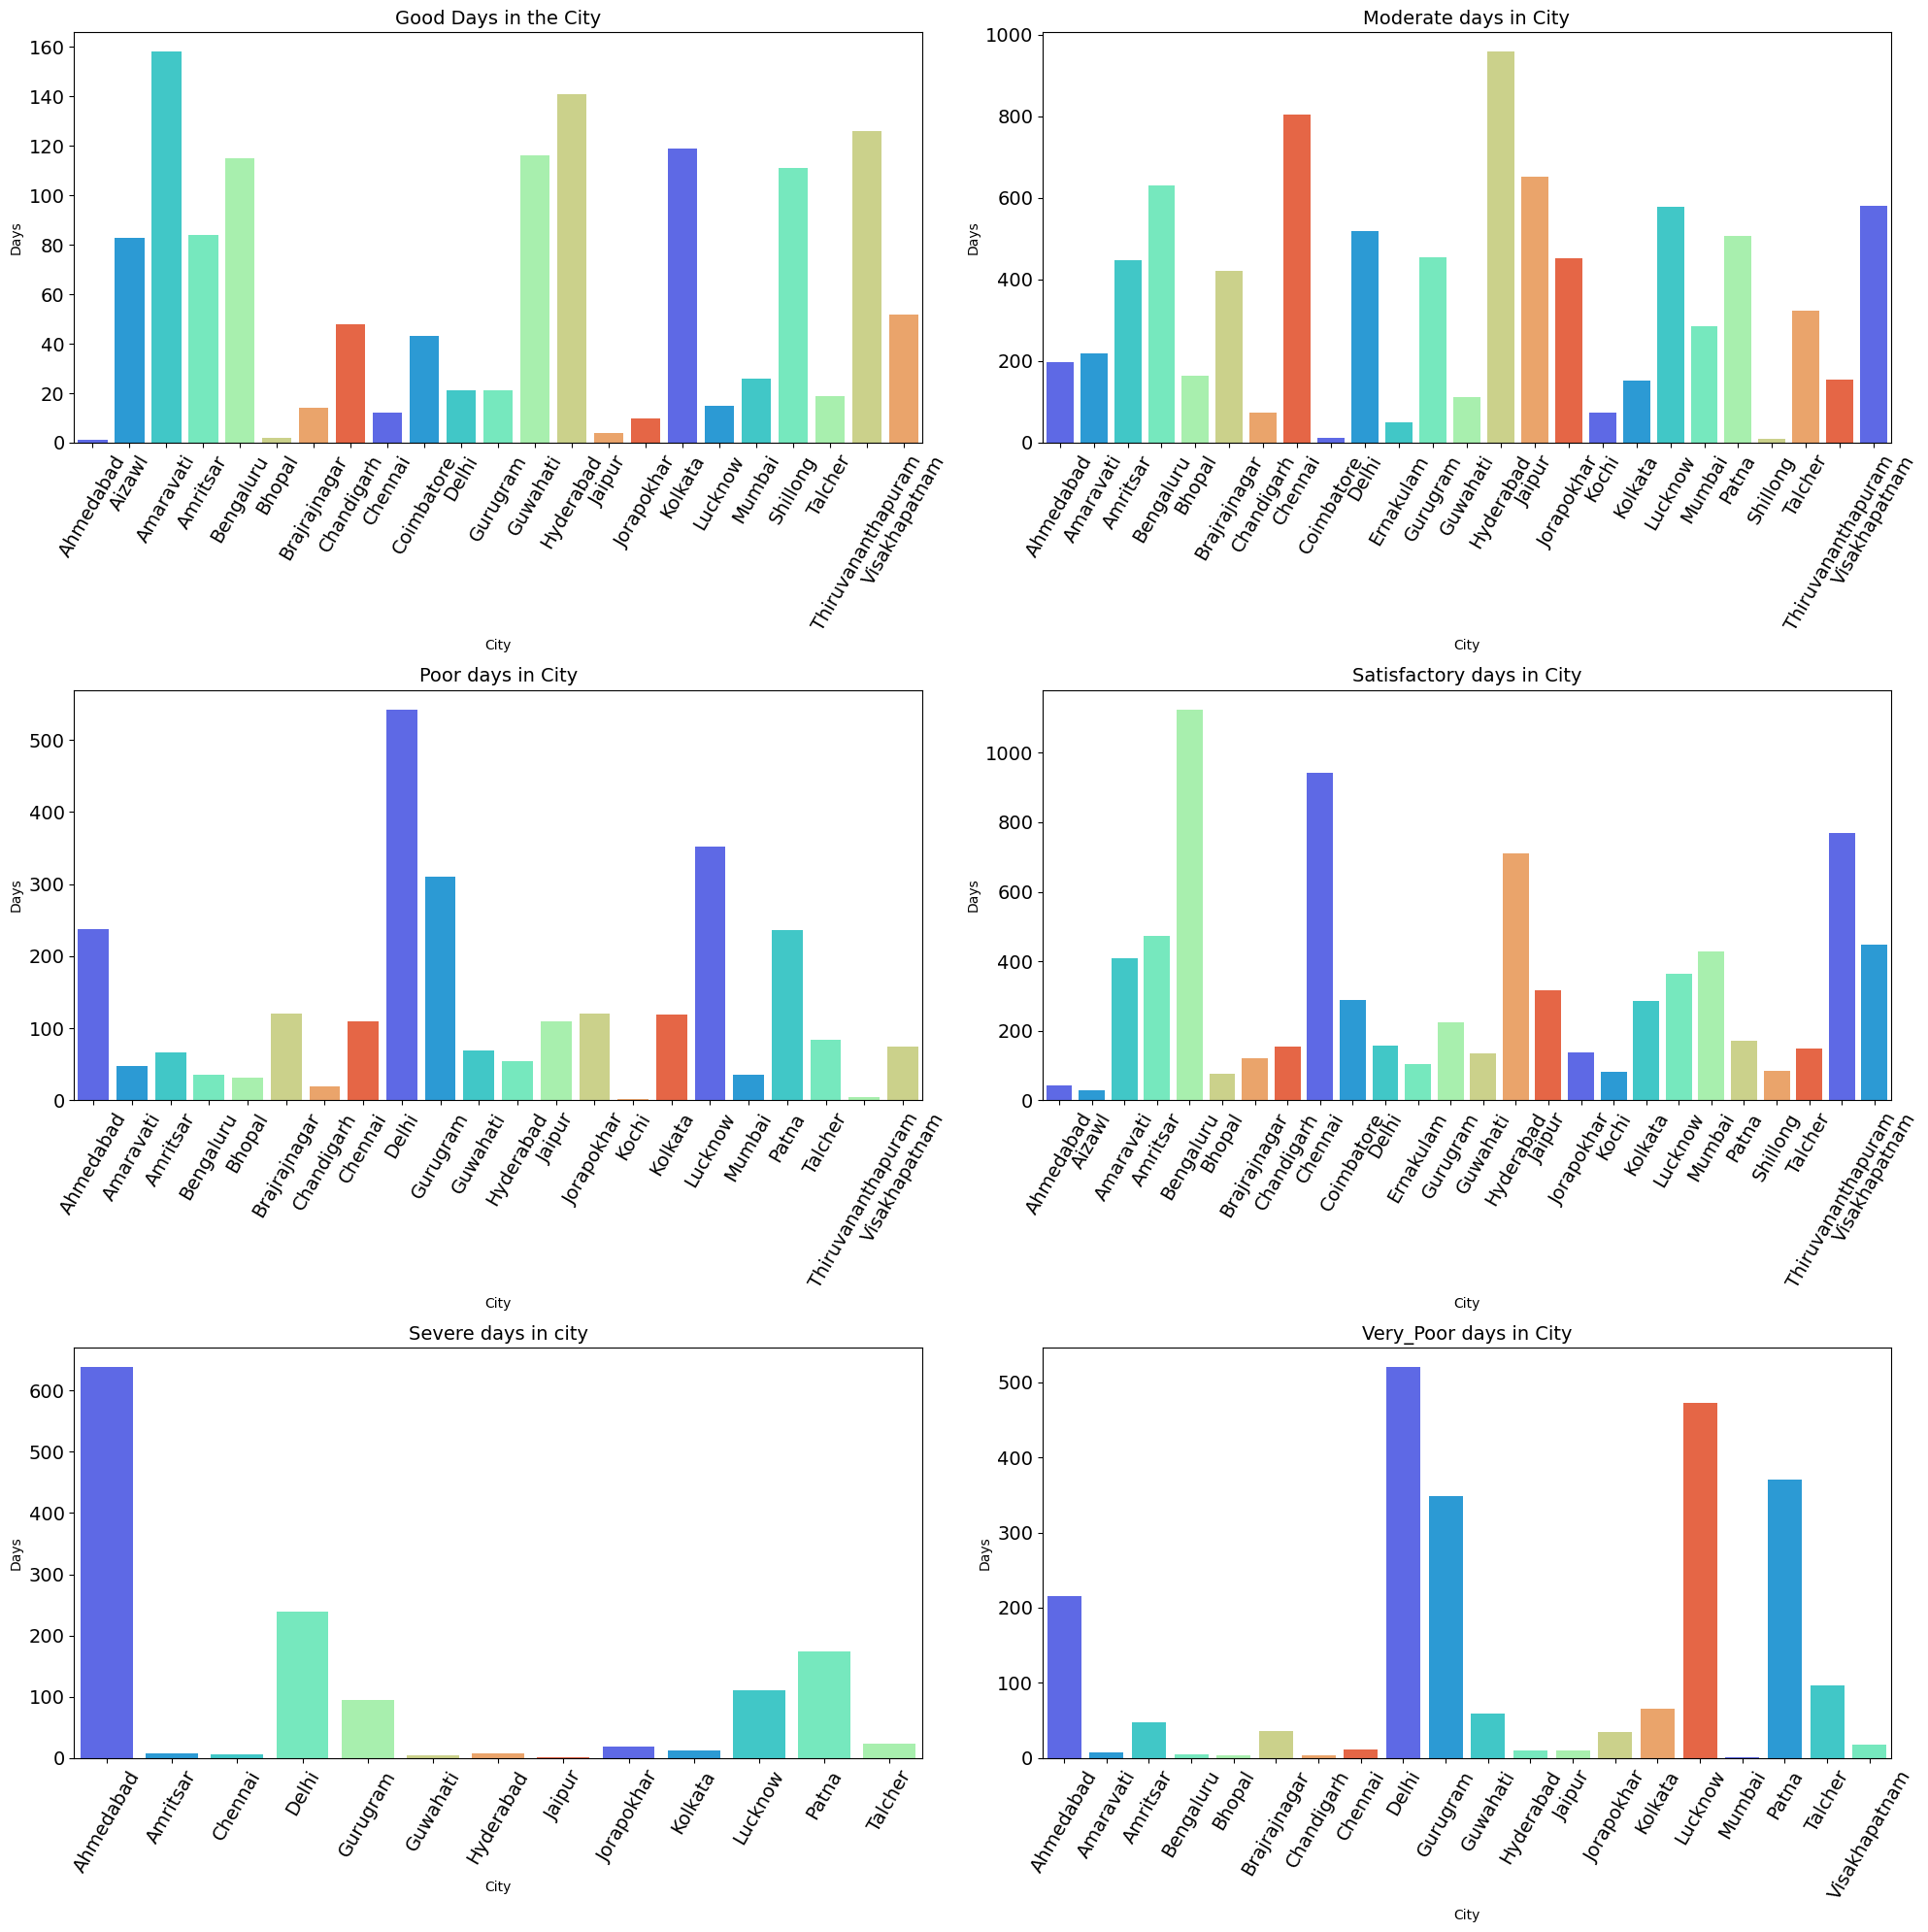

In [22]:
palette = sns.color_palette("rainbow", 8)
plt.figure(figsize=(20,20))
plt.subplot(3,2,1)
sns.barplot(data=good,x=good['City'],y=good['Date'], palette=palette)
plt.xticks(rotation = 60)
plt.xlabel('City'), plt.ylabel('Days')
plt.title("Good Days in the City", fontsize=14), plt.xticks(fontsize=14), plt.yticks(fontsize=14)


plt.subplot(3,2,2)
sns.barplot(data=Moderate,x=Moderate['City'],y=Moderate['Date'], palette=palette)
plt.xticks(rotation = 60)
plt.xlabel('City'), plt.ylabel('Days')
plt.title("Moderate days in City", fontsize=14), plt.xticks(fontsize=14), plt.yticks(fontsize=14)


plt.subplot(3,2,3)
sns.barplot(data=Poor,x=Poor['City'],y=Poor['Date'], palette=palette)
plt.xticks(rotation = 60)
plt.xlabel('City'), plt.ylabel('Days')
plt.title("Poor days in City", fontsize=14), plt.xticks(fontsize=14), plt.yticks(fontsize=14)


plt.subplot(3,2,4)
sns.barplot(data=Satisfactory,x=Satisfactory['City'],y=Satisfactory['Date'], palette=palette)
plt.xticks(rotation = 60)
plt.xlabel('City'), plt.ylabel('Days')
plt.title("Satisfactory days in City", fontsize=14), plt.xticks(fontsize=14), plt.yticks(fontsize=14)


plt.subplot(3,2,5)
sns.barplot(data=Severe,x=Severe['City'],y=Severe['Date'], palette=palette)
plt.xticks(rotation = 60)
plt.xlabel('City'), plt.ylabel('Days')
plt.title("Severe days in city", fontsize=14), plt.xticks(fontsize=14), plt.yticks(fontsize=14)


plt.subplot(3,2,6)
sns.barplot(data=Very_Poor,x=Very_Poor['City'],y=Very_Poor['Date'], palette=palette)
plt.xticks(rotation = 60)
plt.xlabel('City'), plt.ylabel('Days')
plt.title("Very_Poor days in City", fontsize=14), plt.xticks(fontsize=14), plt.yticks(fontsize=14)


plt.tight_layout()
plt.show()

In [23]:
cities=pd.unique(df['City'])

column1=cities+'_AQI'
column2=cities+'_AQI_Bucket'
columns=[*column1,*column2]

In [24]:
final_df=pd.DataFrame(index=np.arange('2015-01-01','2020-07-02',dtype='datetime64[D]'),columns=column1)
for city,i in zip(cities,final_df.columns):
    n=len(np.array(df[df['City']==city]['AQI']))
    final_df[i][-n:]=np.array(df[df['City']==city]['AQI'])

In [25]:
final_df=final_df.astype('float64')
final_df=final_df.resample(rule='MS').mean()

In [26]:
final_df.head()

Ahmedabad_AQI  Aizawl_AQI  Amaravati_AQI  Amritsar_AQI  \
2015-01-01     442.272332         NaN            NaN           NaN   
2015-02-01     513.298886         NaN            NaN           NaN   
2015-03-01     421.818349         NaN            NaN           NaN   
2015-04-01     332.553823         NaN            NaN           NaN   
2015-05-01     269.552353         NaN            NaN           NaN   

            Bengaluru_AQI  Bhopal_AQI  Brajrajnagar_AQI  Chandigarh_AQI  \
2015-01-01      94.318325         NaN               NaN             NaN   
2015-02-01      94.318325         NaN               NaN             NaN   
2015-03-01     107.173113         NaN               NaN             NaN   
2015-04-01     113.733333         NaN               NaN             NaN   
2015-05-01     102.774194         NaN               NaN             NaN   

            Chennai_AQI  Coimbatore_AQI  ...  Jorapokhar_AQI  Kochi_AQI  \
2015-01-01   114.502654             NaN  ...             NaN        NaN   
2015-02-01   114.502654             NaN  ...             NaN        NaN   
2015-03-01   154.711903             NaN  ...             NaN        NaN   
2015-04-01   173.816755             NaN  ...             NaN        NaN   
2015-05-01   176.129032             NaN  ...             NaN        NaN   

            Kolkata_AQI  Lucknow_AQI  Mumbai_AQI  Patna_AQI  Shillong_AQI  \
2015-01-01          NaN   217.973059  105.352258        NaN           NaN   
2015-02-01          NaN   217.973059  105.352258        NaN           NaN   
2015-03-01          NaN   234.401973  105.352258        NaN           NaN   
2015-04-01          NaN   121.899102  105.352258        NaN           NaN   
2015-05-01          NaN   137.000000  105.352258        NaN           NaN   

            Talcher_AQI  Thiruvananthapuram_AQI  Visakhapatnam_AQI  
2015-01-01          NaN                     NaN                NaN  
2015-02-01          NaN                     NaN                NaN  
2015-03-01          NaN                     NaN                NaN  
2015-04-01          NaN                     NaN                NaN  
2015-05-01          NaN                     NaN                NaN  

[5 rows x 26 columns]

In [27]:
final_df['India_AQI']=final_df.mean(axis=1)

In [28]:
final_df.head()

Ahmedabad_AQI  Aizawl_AQI  Amaravati_AQI  Amritsar_AQI  \
2015-01-01     442.272332         NaN            NaN           NaN   
2015-02-01     513.298886         NaN            NaN           NaN   
2015-03-01     421.818349         NaN            NaN           NaN   
2015-04-01     332.553823         NaN            NaN           NaN   
2015-05-01     269.552353         NaN            NaN           NaN   

            Bengaluru_AQI  Bhopal_AQI  Brajrajnagar_AQI  Chandigarh_AQI  \
2015-01-01      94.318325         NaN               NaN             NaN   
2015-02-01      94.318325         NaN               NaN             NaN   
2015-03-01     107.173113         NaN               NaN             NaN   
2015-04-01     113.733333         NaN               NaN             NaN   
2015-05-01     102.774194         NaN               NaN             NaN   

            Chennai_AQI  Coimbatore_AQI  ...  Kochi_AQI  Kolkata_AQI  \
2015-01-01   114.502654             NaN  ...        NaN          NaN   
2015-02-01   114.502654             NaN  ...        NaN          NaN   
2015-03-01   154.711903             NaN  ...        NaN          NaN   
2015-04-01   173.816755             NaN  ...        NaN          NaN   
2015-05-01   176.129032             NaN  ...        NaN          NaN   

            Lucknow_AQI  Mumbai_AQI  Patna_AQI  Shillong_AQI  Talcher_AQI  \
2015-01-01   217.973059  105.352258        NaN           NaN          NaN   
2015-02-01   217.973059  105.352258        NaN           NaN          NaN   
2015-03-01   234.401973  105.352258        NaN           NaN          NaN   
2015-04-01   121.899102  105.352258        NaN           NaN          NaN   
2015-05-01   137.000000  105.352258        NaN           NaN          NaN   

            Thiruvananthapuram_AQI  Visakhapatnam_AQI   India_AQI  
2015-01-01                     NaN                NaN  203.702342  
2015-02-01                     NaN                NaN  211.797314  
2015-03-01                     NaN                NaN  198.439672  
2015-04-01                     NaN                NaN  184.173752  
2015-05-01                     NaN                NaN  181.825083  

[5 rows x 27 columns]

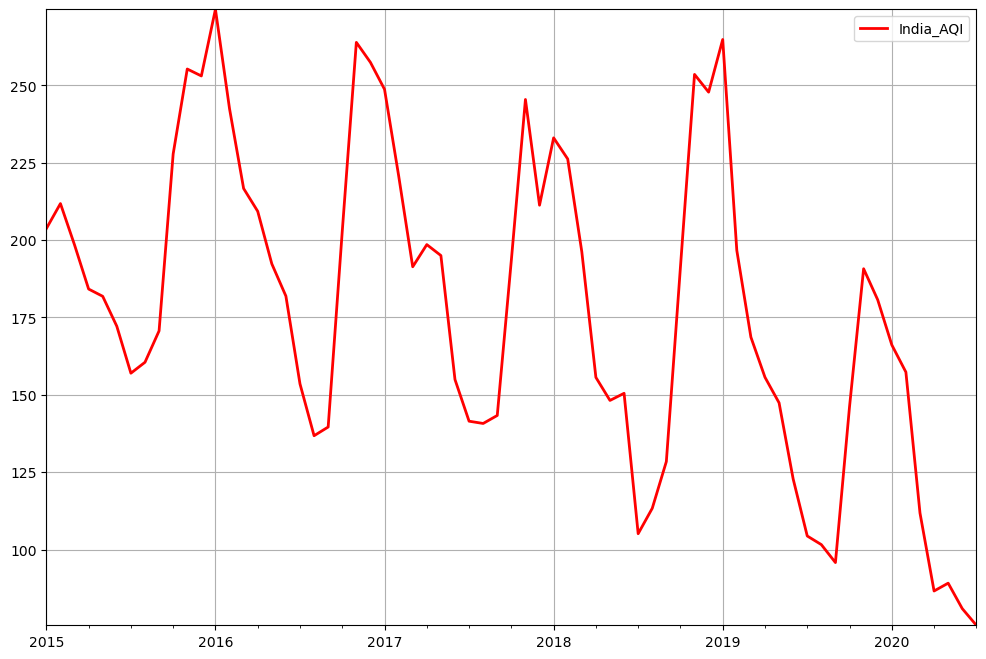

In [29]:
ax=final_df[['India_AQI']].plot(figsize=(12,8),grid=True,lw=2,color='Red')
ax.autoscale(enable=True,axis='both',tight=True)

In [30]:
df_2019=final_df['2019-01-01':'2020-01-01']

In [31]:
df_2019.isna().sum()

Ahmedabad_AQI              0
Aizawl_AQI                13
Amaravati_AQI              0
Amritsar_AQI               0
Bengaluru_AQI              0
Bhopal_AQI                 8
Brajrajnagar_AQI           0
Chandigarh_AQI             8
Chennai_AQI                0
Coimbatore_AQI             5
Delhi_AQI                  0
Ernakulam_AQI             12
Gurugram_AQI               0
Guwahati_AQI               1
Hyderabad_AQI              0
Jaipur_AQI                 0
Jorapokhar_AQI             0
Kochi_AQI                 12
Kolkata_AQI                0
Lucknow_AQI                0
Mumbai_AQI                 0
Patna_AQI                  0
Shillong_AQI               7
Talcher_AQI                0
Thiruvananthapuram_AQI     0
Visakhapatnam_AQI          0
India_AQI                  0
dtype: int64

In [32]:
df_2019=df_2019.drop(['Aizawl_AQI','Ernakulam_AQI','Kochi_AQI'],axis=1)
AQI_2019=df_2019.mean(axis=0)
AQI_2019

Ahmedabad_AQI             498.736861
Amaravati_AQI              97.267343
Amritsar_AQI              109.238316
Bengaluru_AQI              91.991935
Bhopal_AQI                153.002787
Brajrajnagar_AQI          149.376435
Chandigarh_AQI            125.825212
Chennai_AQI               101.903261
Coimbatore_AQI             76.239500
Delhi_AQI                 238.050461
Gurugram_AQI              198.915897
Guwahati_AQI              142.815380
Hyderabad_AQI              94.866377
Jaipur_AQI                119.949486
Jorapokhar_AQI            158.295605
Kolkata_AQI               150.024684
Lucknow_AQI               208.207480
Mumbai_AQI                112.763849
Patna_AQI                 222.322927
Shillong_AQI               50.229011
Talcher_AQI               179.968974
Thiruvananthapuram_AQI     76.385919
Visakhapatnam_AQI         123.192804
India_AQI                 157.032005
dtype: float64

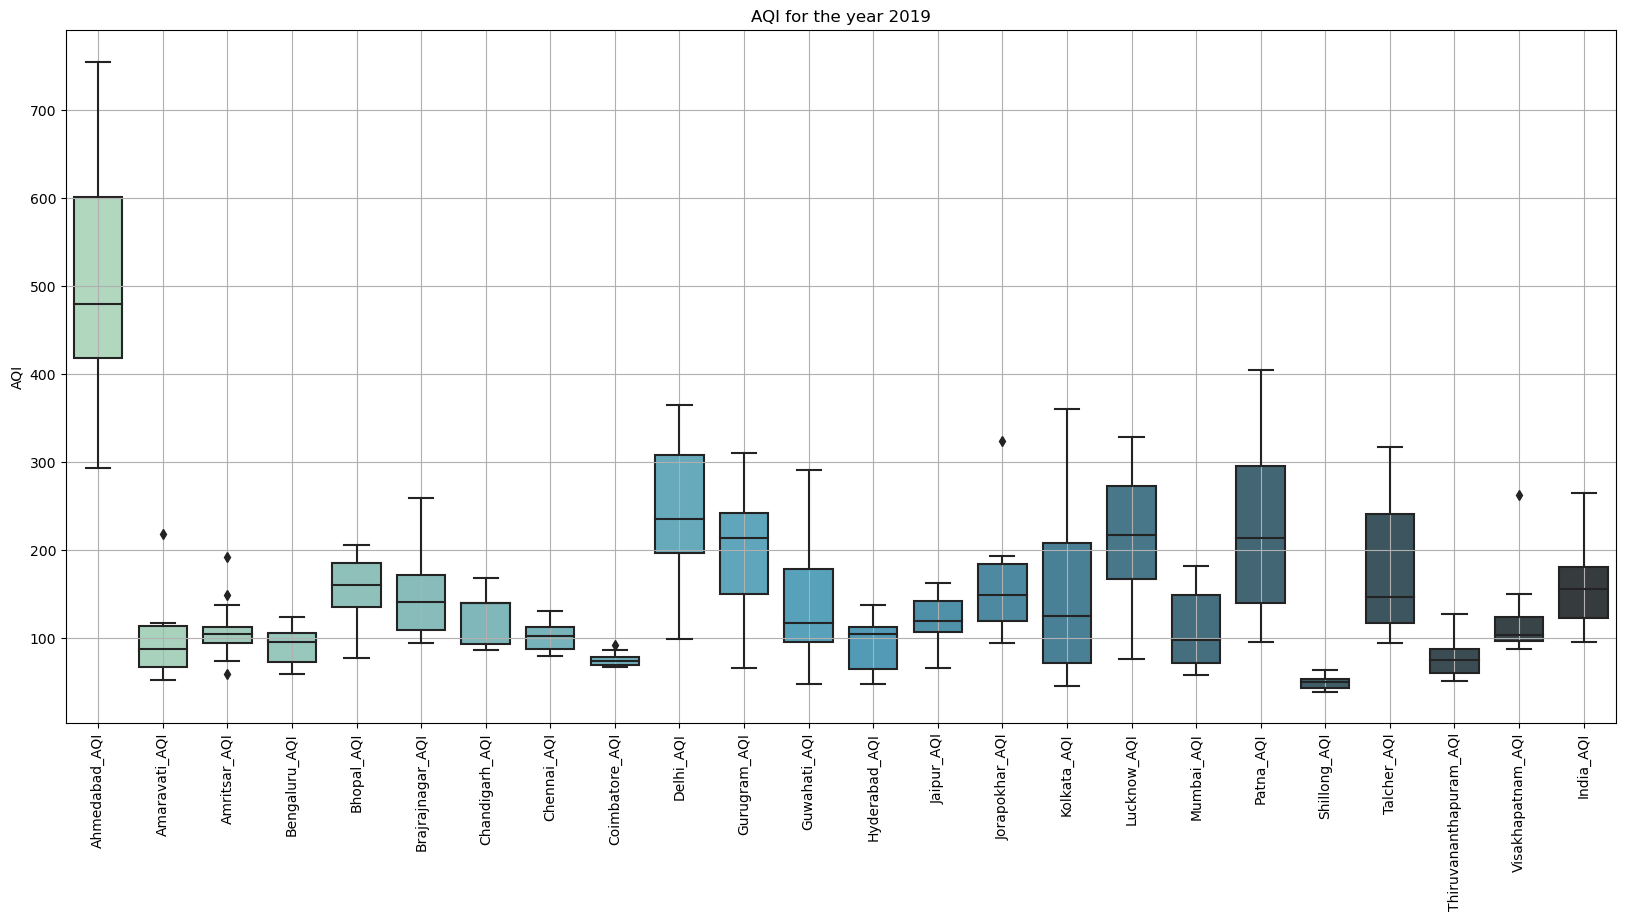

In [33]:
plt.figure(figsize=(20,9))
plt.title('AQI for the year 2019')
plt.xticks(rotation=90)
bplot=sns.boxplot(data=df_2019,width=0.75,palette="GnBu_d")
plt.ylabel('AQI');
bplot.grid(True)

<AxesSubplot:ylabel='AQI'>

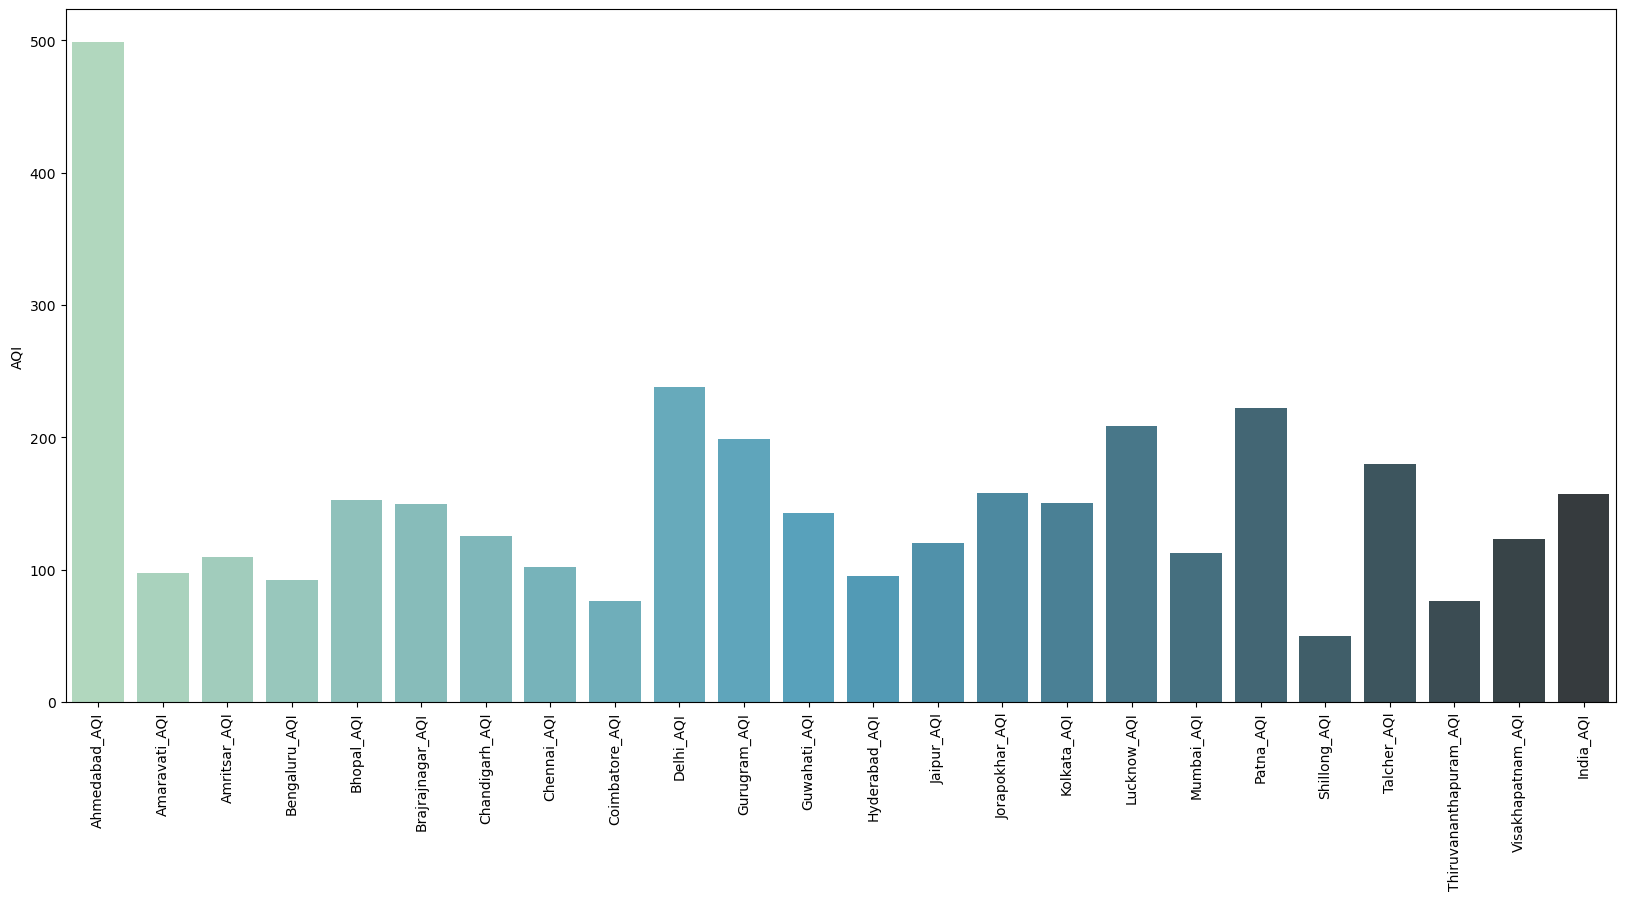

In [34]:
plt.figure(figsize=(20,9))
plt.xticks(rotation=90)
plt.ylabel('AQI')
sns.barplot(AQI_2019.index,AQI_2019.values,palette="GnBu_d")

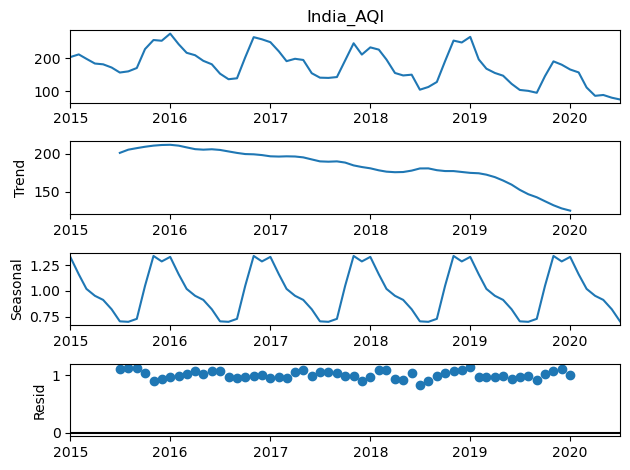

In [35]:
from statsmodels.tsa.seasonal import seasonal_decompose
India_AQI=final_df['India_AQI']
result=seasonal_decompose(India_AQI,model='multiplicative')
result.plot();

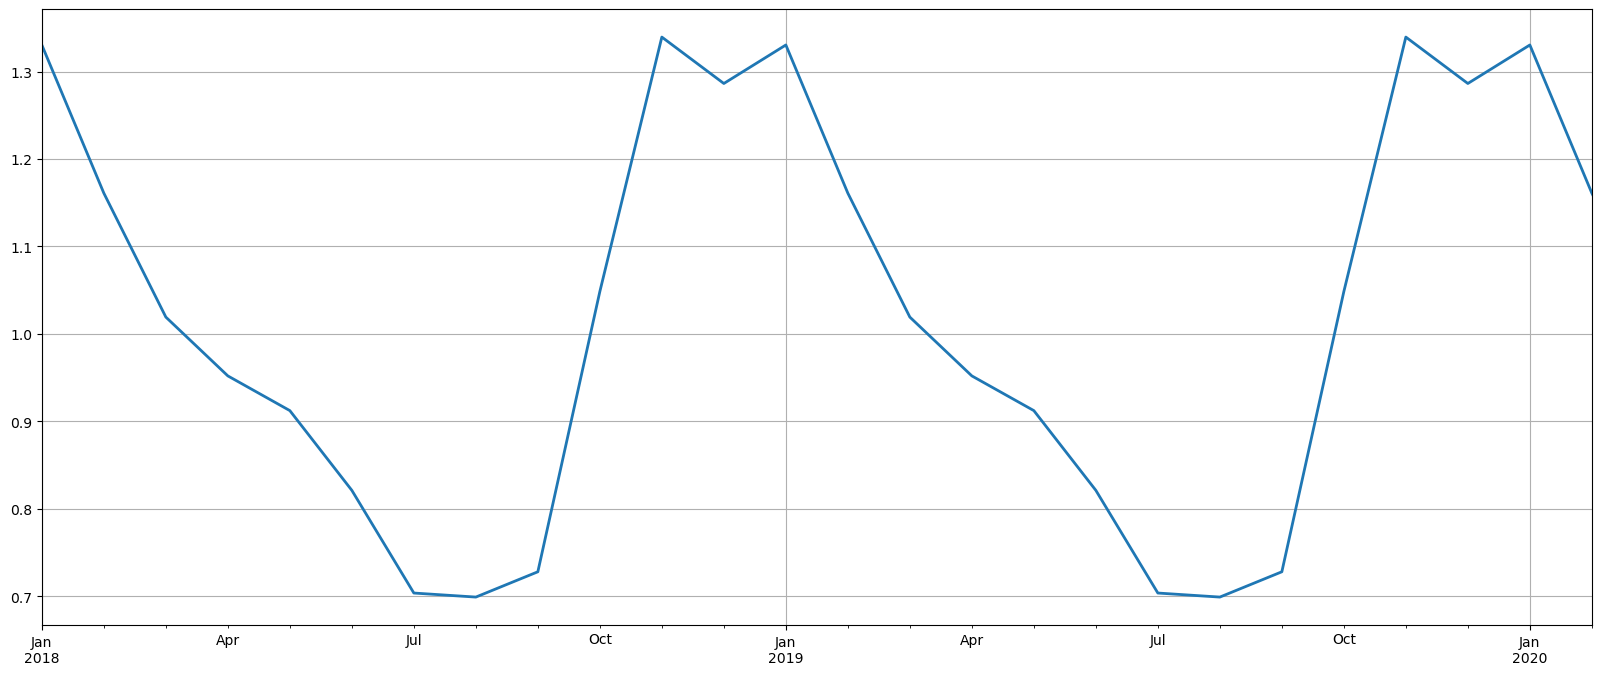

In [36]:
from matplotlib import dates
ax=result.seasonal.plot(xlim=['2018-01-01','2020-02-10'],figsize=(20,8),lw=2)
ax.yaxis.grid(True)
ax.xaxis.grid(True)

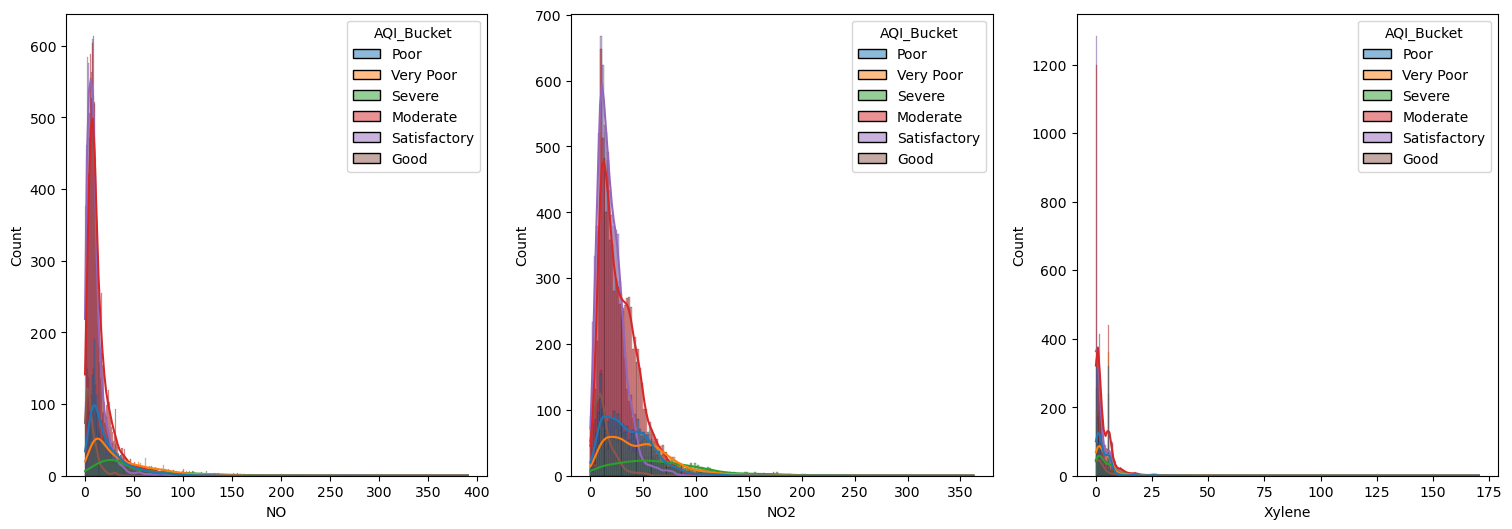

In [37]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df,x='NO',kde=True,hue='AQI_Bucket')
plt.subplot(142)
sns.histplot(data=df,x='NO2',kde=True,hue='AQI_Bucket')
plt.subplot(143)
sns.histplot(data=df,x='Xylene',kde=True,hue='AQI_Bucket')
plt.show()

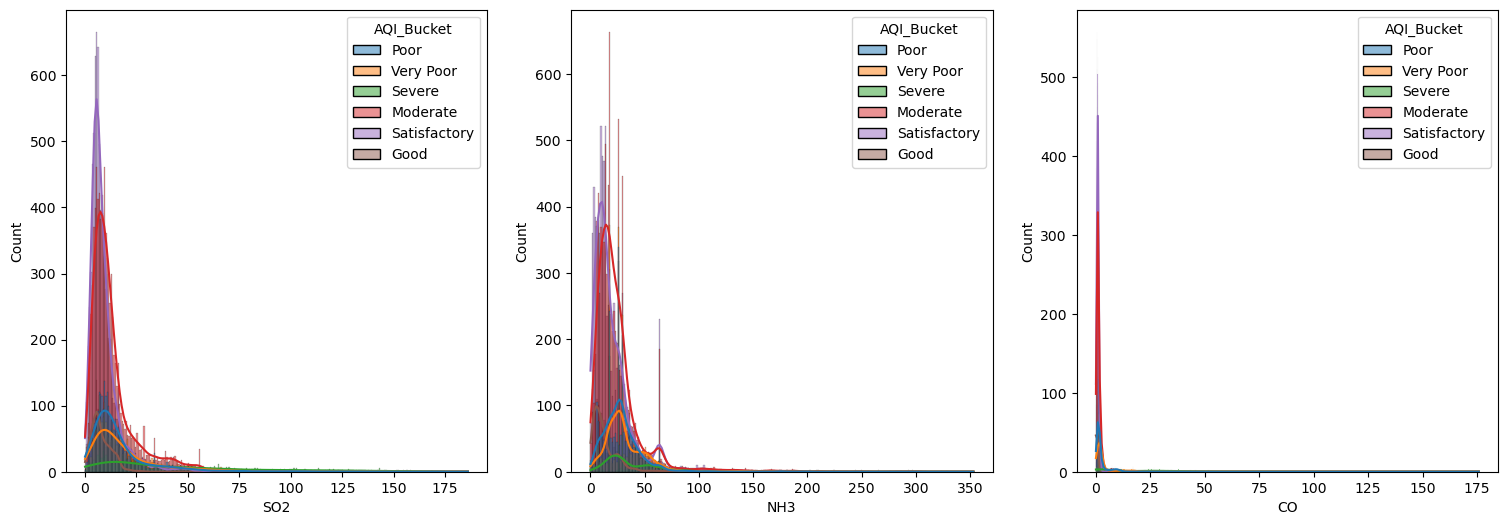

In [38]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df,x='SO2',kde=True,hue='AQI_Bucket')
plt.subplot(142)
sns.histplot(data=df,x='NH3',kde=True,hue='AQI_Bucket')
plt.subplot(143)
sns.histplot(data=df,x='CO',kde=True,hue='AQI_Bucket')
plt.show()

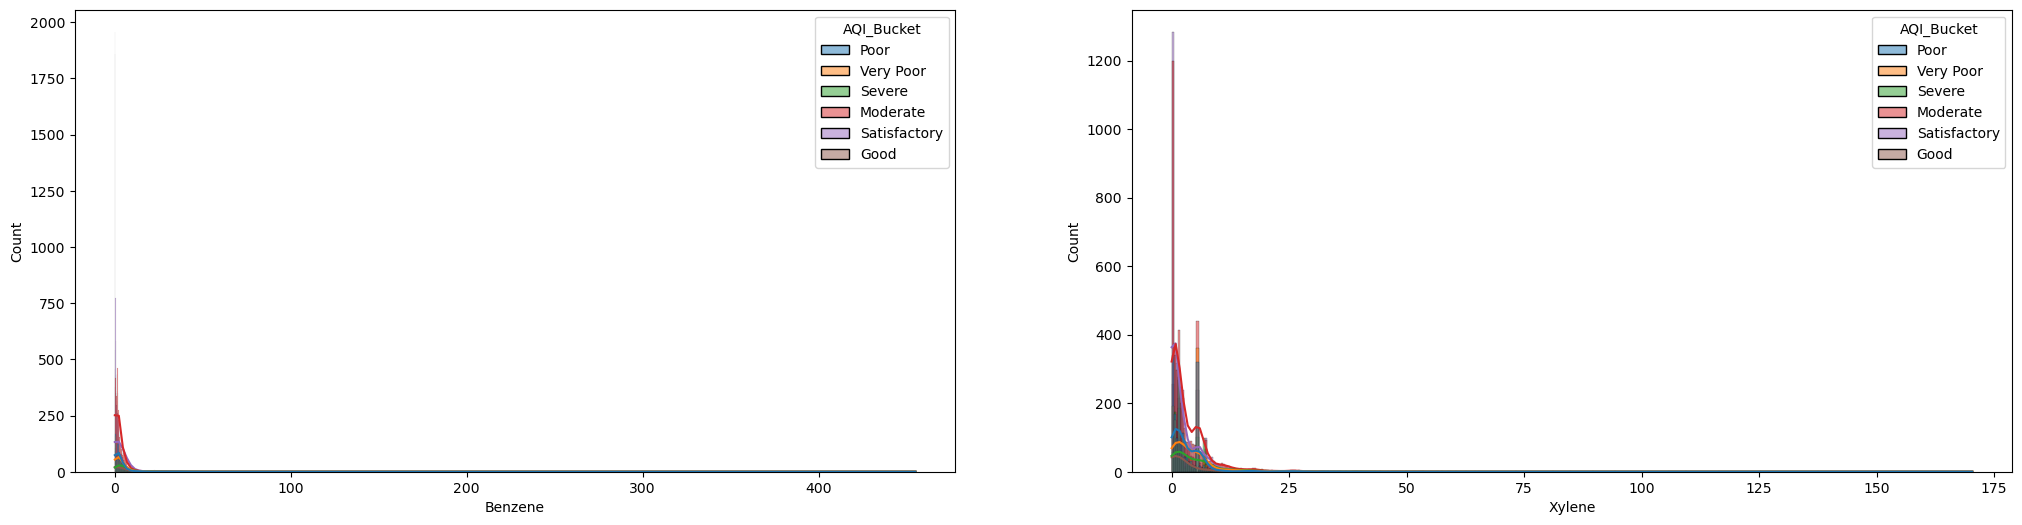

In [39]:
plt.subplots(1,2,figsize=(25,6))
plt.subplot(121)
sns.histplot(data=df,x='Benzene',kde=True,hue='AQI_Bucket')
plt.subplot(122)
sns.histplot(data=df,x='Xylene',kde=True,hue='AQI_Bucket')
plt.show()

In [40]:
df.head().style.background_gradient(cmap = "autumn")

### 📈Step 4) Training a Regression Model

#### 1) Data Preparation

DataPreparation: 
The data preparation process entails cleaning as well as preparation of raw data from the business understanding 4.2.3 Data preprocessing Initially the data set contains noisy, inconsistent data and missing values. The data has to be preprocessed to remove the unwanted data and to make the data useful. Data preprocessing helps to transform data into useful format. The following steps were involved in data preprocessing. 
1) Data cleaning 

2) Data reduction

3) Data transformation 


In [41]:
reg_df=df.copy()

In [42]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [43]:
reg_df.drop(['City','Date','AQI_Bucket'],axis=1,inplace=True)

In [44]:
reg_df.dropna(inplace=True)

In [45]:
X=reg_df.drop('AQI',axis=1)
y=reg_df['AQI']

In [46]:
X=sc.fit_transform(X)

#### 2)Training and testing the model:

Firstly, we’ve collected the data set from kaggle. Then we performed data preprocessing techniques like data cleaning, data reduction on the data. At first the data related to the city Delhi is extracted. After that all the tuples which has missing values were ignored. Further data cleaning is performed for better and accurate results. Then data is split into two parameters which contains air particles composition in one parameter and AQI data in other parameter. We’ve considered PM 2.5, PM 10 and NO2 variables for predicting the AQI variable. 

In [47]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

((11450, 10), (2863, 10))

In [48]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [49]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from sklearn.ensemble import BaggingRegressor
from xgboost import XGBRegressor
import warnings

In [50]:
models = {
    "Linear Regression": LinearRegression(),
    "SVR": SVR(kernel='linear'),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor(),
    "BaggingRegressor": BaggingRegressor(base_estimator=DecisionTreeRegressor())
}
model_list = []
r2_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 42.8817
- Mean Absolute Error: 26.8810
- R2 Score: 0.8376
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 39.6950
- Mean Absolute Error: 26.3447
- R2 Score: 0.8545


SVR
Model performance for Training set
- Root Mean Squared Error: 45.3051
- Mean Absolute Error: 24.8183
- R2 Score: 0.8187
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 41.6305
- Mean Absolute Error: 24.5486
- R2 Score: 0.8399


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 27.7903
- Mean Absolute Error: 15.8316
- R2 Score: 0.9318
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 32.6091
- Mean Absolute Error: 19.2549
- R2 Score: 0.9018


Decision Tree
Model performance for Training set
- Root Mean Squared Error: 3.8492
- Mean Absolute Error: 0.1983
- R2 Score: 0.9987
-----

### ▶️Model Evaluation

#### Cross-validation
###### What is cross-validation?

In cross-validation, we run our modeling process on different subsets of the data to get multiple measures of model quality.

###### When should you use cross-validation?

Cross-validation gives a more accurate measure of model quality, which is especially important if you are making a lot of modeling decisions. However, it can take longer to run, because it estimates multiple models (one for each fold).

So, given these tradeoffs, when should you use each approach?

For small datasets, where extra computational burden isn't a big deal, you should run cross-validation.
For larger datasets, a single validation set is sufficient. Your code will run faster, and you may have enough data that there's little need to re-use some of it for holdout.
There's no simple threshold for what constitutes a large vs. small dataset. But if your model takes a couple minutes or less to run, it's probably worth switching to cross-validation.

Alternatively, you can run cross-validation and see if the scores for each experiment seem close. If each experiment yields the same results, a single validation set is probably sufficient.


### 🧪Regression Evaluation Metrics

#### Here are three common evaluation metrics for regression problems:

Mean Absolute Error (MAE) is the mean of the absolute value of the errors:
    

Mean Squared Error (MSE) is the mean of the squared errors:
    

Root Mean Squared Error (RMSE) is the square root of the mean of the squared errors:
    

In [51]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

Model Name  R2_Score
6    CatBoosting Regressor  0.926609
4  Random Forest Regressor  0.920412
5             XGBRegressor  0.918325
8         BaggingRegressor  0.915128
2    K-Neighbors Regressor  0.901799
0        Linear Regression  0.854484
1                      SVR  0.839948
3            Decision Tree  0.828793
7       AdaBoost Regressor  0.794149

In [52]:
lin_model =CatBoostRegressor(verbose=False)
lin_model = lin_model.fit(X_train, y_train)
y_pred = lin_model.predict(X_test)
score = r2_score(y_test, y_pred)*100
print(" Accuracy of the model is %.2f" %score)

 Accuracy of the model is 92.66


In [53]:
evaluate_model(y_pred,y_test)

(16.49143016045559, 28.19051627495987, 0.9219224613473123)

In [54]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

Actual Value  Predicted Value  Difference
13885         352.0       328.141447   23.858553
13355         216.0       260.596581  -44.596581
10415         298.0       192.092259  105.907741
13055         238.0       221.245698   16.754302
16164         118.0       116.962683    1.037317
...             ...              ...         ...
15570          54.0        62.332375   -8.332375
15284         109.0       100.915933    8.084067
28578          95.0       129.058368  -34.058368
19655         295.0       282.027409   12.972591
10662         248.0       276.683242  -28.683242

[2863 rows x 3 columns]

### ▶️Improve model

From the above inference,we found CatBoostRegressor shows best R2 score whith high level of accuracy.The ﬁnal step in the process of appliedmachine learning before presenting results is algorithm tuning.It is sometimes called Hyperparameter optimization wherethe algorithm parameters are referred to as hyperparameterswhereas the coefﬁcients found by the machine learning al-gorithm itself are referred to as parameters. Optimizationsuggests the search-nature of the problem. There are differentsearch strategies to ﬁnd a good and robust parameter or set of parameters for an algorithm on a given problem. The onethat this paper focuses is Grid Search CV. Grid search is anapproach to parameter tuning that will methodically build andevaluate a model for each combination of algorithm parametersspeciﬁed in a grid. 

#### A. Estimator:

This is used to implement scikit-learn estimator inter-face.The classiﬁer that is to be trained is passed to thisparameter.

#### B. Parameter grid:

A python dictionary with parameter names as keys and listof parameter settings as values. All the combinations of theseparameters are tested to check the best accurac

In [55]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'depth': [4, 6, 8],                     # Tree depth
    'learning_rate': [0.1, 0.01, 0.001],     # Learning rate
    'iterations': [100, 200, 300],           # Number of boosting iterations
    'l2_leaf_reg': [1, 3, 5],                # L2 regularization coefficient
    'random_seed': [42]                      # Random seed for reproducibility
}




In [56]:
catboost_model = CatBoostRegressor()
grid_search = GridSearchCV(estimator=catboost_model, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

0:	learn: 97.5069270	total: 9.19ms	remaining: 910ms
1:	learn: 90.0641500	total: 17.7ms	remaining: 869ms
2:	learn: 83.4399039	total: 25.3ms	remaining: 819ms
3:	learn: 77.4741184	total: 33.1ms	remaining: 794ms
4:	learn: 72.2473887	total: 40.6ms	remaining: 771ms
5:	learn: 67.4919201	total: 48.8ms	remaining: 765ms
6:	learn: 63.4771407	total: 58.4ms	remaining: 776ms
7:	learn: 59.7742574	total: 67.2ms	remaining: 773ms
8:	learn: 56.6167089	total: 74.6ms	remaining: 755ms
9:	learn: 53.8246045	total: 83.2ms	remaining: 749ms
10:	learn: 51.2908502	total: 90.7ms	remaining: 734ms
11:	learn: 49.3588975	total: 101ms	remaining: 739ms
12:	learn: 47.4816817	total: 108ms	remaining: 725ms
13:	learn: 45.7371379	total: 119ms	remaining: 732ms
14:	learn: 44.2030168	total: 124ms	remaining: 703ms
15:	learn: 43.0661618	total: 130ms	remaining: 683ms
16:	learn: 41.9445637	total: 135ms	remaining: 657ms
17:	learn: 40.9690134	total: 139ms	remaining: 633ms
18:	learn: 40.0644442	total: 144ms	remaining: 613ms
19:	learn: 

GridSearchCV(cv=5,
             estimator=<catboost.core.CatBoostRegressor object at 0x000001DE6A89A640>,
             param_grid={'depth': [4, 6, 8], 'iterations': [100, 200, 300],
                         'l2_leaf_reg': [1, 3, 5],
                         'learning_rate': [0.1, 0.01, 0.001],
                         'random_seed': [42]})

In [57]:
print("Best Hyperparameters:", grid_search.best_params_)

Best Hyperparameters: {'depth': 8, 'iterations': 300, 'l2_leaf_reg': 1, 'learning_rate': 0.1, 'random_seed': 42}


In [58]:
clfR = CatBoostRegressor(depth=8, iterations=300, l2_leaf_reg= 1, learning_rate= 0.1, random_seed= 42)
clfR.fit(X_train,y_train)

0:	learn: 97.5629878	total: 27.1ms	remaining: 8.1s
1:	learn: 89.7363408	total: 52.7ms	remaining: 7.85s
2:	learn: 82.9461351	total: 78.2ms	remaining: 7.74s
3:	learn: 76.5452614	total: 99.7ms	remaining: 7.38s
4:	learn: 70.8706445	total: 124ms	remaining: 7.31s
5:	learn: 66.0185012	total: 147ms	remaining: 7.19s
6:	learn: 61.5740545	total: 170ms	remaining: 7.13s
7:	learn: 57.8662924	total: 196ms	remaining: 7.15s
8:	learn: 54.4854669	total: 220ms	remaining: 7.11s
9:	learn: 51.5914231	total: 247ms	remaining: 7.15s
10:	learn: 48.9042547	total: 271ms	remaining: 7.13s
11:	learn: 46.6050046	total: 296ms	remaining: 7.11s
12:	learn: 44.5996113	total: 318ms	remaining: 7.01s
13:	learn: 42.9185193	total: 342ms	remaining: 6.98s
14:	learn: 41.3845091	total: 365ms	remaining: 6.93s
15:	learn: 39.9609411	total: 387ms	remaining: 6.87s
16:	learn: 38.8335352	total: 410ms	remaining: 6.83s
17:	learn: 37.7770355	total: 431ms	remaining: 6.75s
18:	learn: 36.9327503	total: 452ms	remaining: 6.68s
19:	learn: 36.09866

In [59]:
y_pred = clfR.predict(X_test)
score = r2_score(y_test, y_pred)*100
print(" Accuracy of the model is %.2f" %score)

 Accuracy of the model is 92.34


In [60]:
evaluate_model(y_pred,y_test)

(16.659174287777045, 28.793769424845888, 0.9186967361342772)

In [61]:
from sklearn import metrics 
print ("MAE:", metrics.mean_absolute_error (y_test, y_pred))

print ("RMSE:", np.sqrt(metrics.mean_squared_error (y_test, y_pred)))

MAE: 16.659174287777045
RMSE: 28.793769424845888


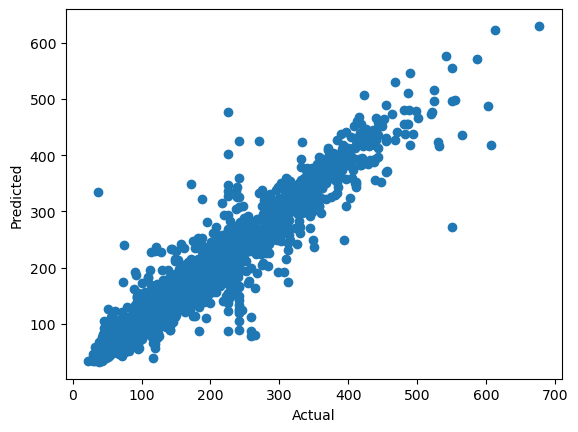

In [62]:
plt.scatter(y_test,y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');

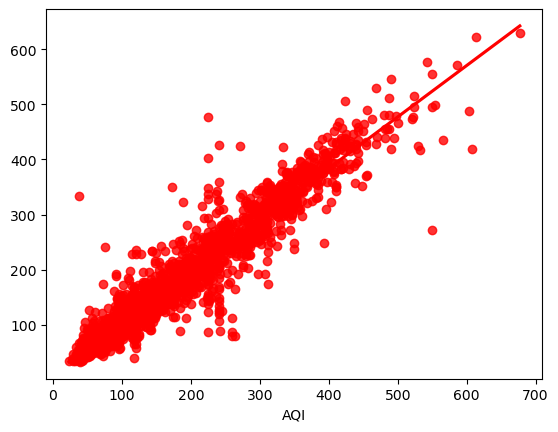

In [63]:
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red');

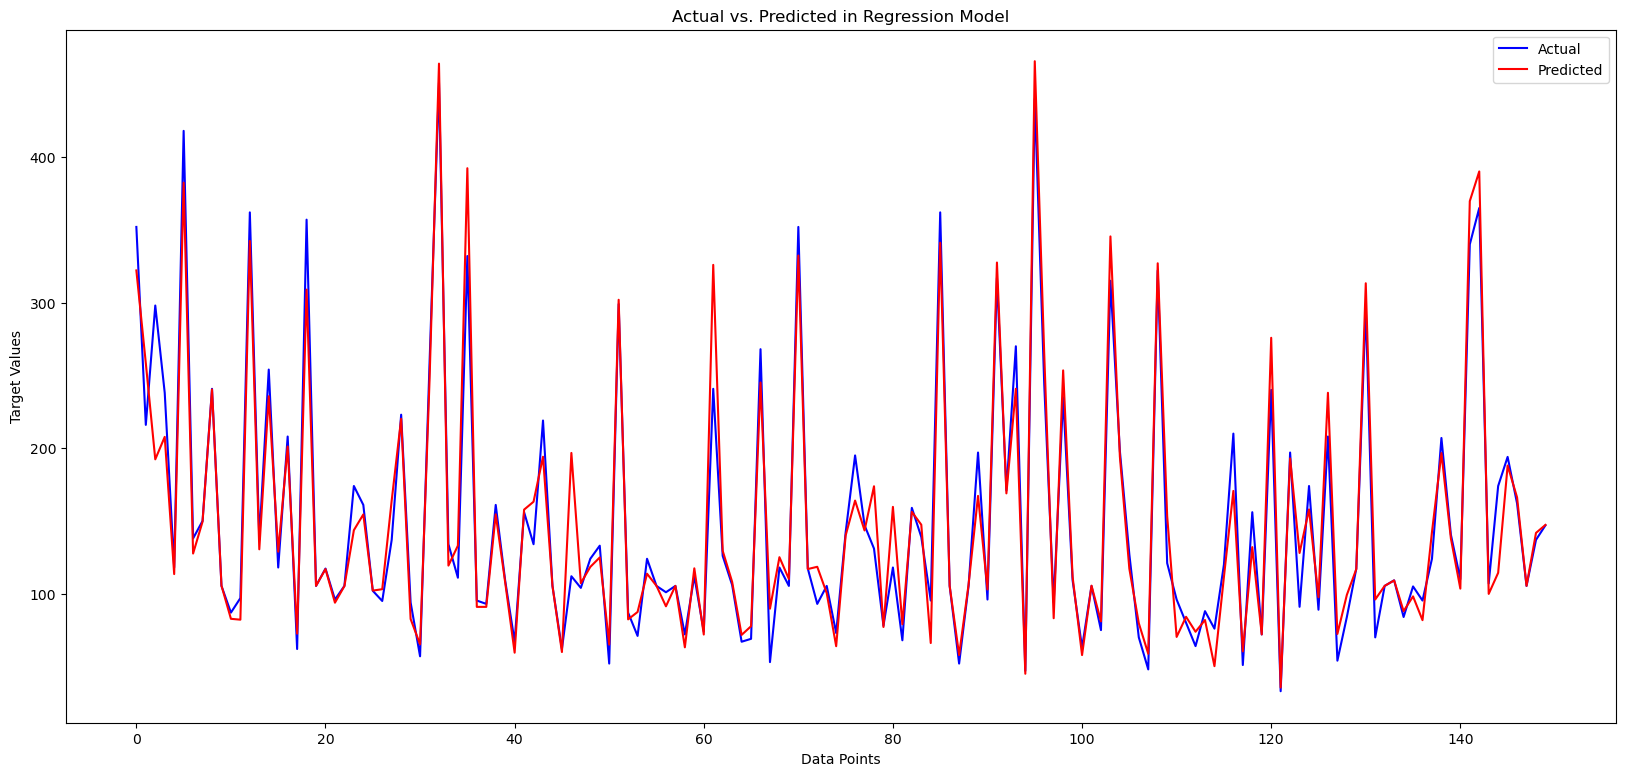

In [64]:
# Create an array of indices to use as the x-axis (assuming sequential data)

plt.figure(figsize=(20,9))
x = range(len(y_test[:150]))

# Plot the actual target values in blue
plt.plot(x, y_test[:150], label='Actual', color='blue')

# Plot the predicted values in red
plt.plot(x, y_pred[:150], label='Predicted', color='red')

# Add labels and title
plt.xlabel('Data Points')
plt.ylabel('Target Values')
plt.title('Actual vs. Predicted in Regression Model')

# Show legend
plt.legend()

# Show the plot
plt.show()